In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import imutils

In [59]:
# cam = cv2.VideoCapture("../data/proc/hello-training-data/output4.avi")
# ret, frame = cam.read()
# img = frame.copy()

### Main point: show how you handle rotation of rect coords on a rotated img

In [60]:
def draw_rect(img, rect, color='yellow', thick=1):
    COLOR = (0, 255, 255)
    if color == 'blue':
        COLOR = (255,0,0)
    cv2.rectangle(img, rect[0], rect[1], COLOR, thick)
    return img

In [66]:
class OrientClass:
    
    def __init__(self):
        self.orientation = 0
    
    def setOrientation(self, orientation):
        self.orientation = orientation
        
    def adjOrientationRect(self, rect, (imgH, imgW)):
        ''' adjusting bounding box from selectROI into original images orientation '''

        if self.orientation == 0:
            return rect

        x, y, dx, dy = rect

        h, w = imgH, imgW

        if self.orientation == 90:

            x_new = y
            y_new =  h - (dx + x)
            dx_new = dy
            dy_new = dx

        elif self.orientation == 180:

            x_new = -dx + h - x
            y_new = -dy + w - y
            dx_new = dx
            dy_new = dy

        elif self.orientation == 270:

            x_new = w - (dy + y)
            y_new =  x
            dx_new = dy
            dy_new = dx

        else:
            return rect

        return (x_new, y_new, dx_new, dy_new)

In [80]:
#but why doesn't the below work? it works in guiview/ControlDisplay
#because this is a different type of operation, and rect changes coords each time

(10, 20, 3)
[0 0 0]
<type 'numpy.ndarray'>
6 2 3 5


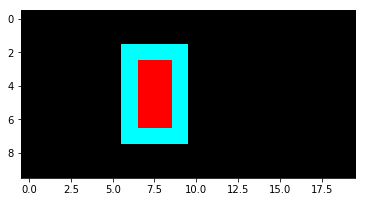

2 1 5 3


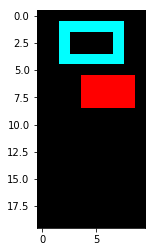

1 13 3 5


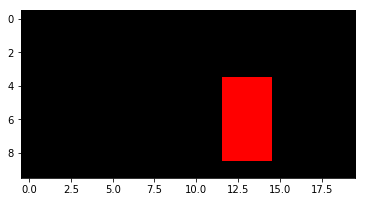

13 6 5 3


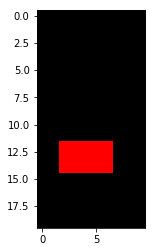

In [79]:
#Setup Test Img
H,W = 10, 20
img = np.zeros(shape=(H,W,3))
img = np.array(img, dtype=np.uint8)

x0, dx = 6, 3
y0, dy = 2, 5
for x in range(x0,x0+dx):
    for y in range (y0,y0+dy):
        img[y,x] = np.array([255,0,0] ,dtype=np.uint8)

#Display info about Test Img
print img.shape
print img[0,0]
print type(img)

oc = OrientClass()
        
for i in range(4):
    
    _img = imutils.rotate_bound(img, i*90)
    
#     need to set at each rotation, as the red rect changes coors
#     (x0,y0,dx,dy)
    
    oc.setOrientation(i*90)
    _x0, _y0, _dx, _dy = oc.adjOrientationRect((x0,y0,dx,dy), (H,W))
    
    print _x0, _y0, _dx, _dy
    
    _img = draw_rect(_img, ((_x0, _y0), (_x0+_dx, _y0+_dy)) )
    
    plt.imshow(_img)
    plt.show()